¡Hola, Elias!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola, Elias! Realizaste un gran trabajo con el desarrollo del ejercicio, desde la carga de datos hasta el desarrollo de las prueba de hipótesis, cada vez estas más cercas de convertirte en una analista de datos. Solamente te dejo algunos comentarios para terminar de compleentar los análisis
</div>

# Proyecto 6: proyecto integrado


## Preambulo; se cargan librerias y se declara la funcion de exploracion

Hola, querido revisor anónimo, hice una descripción más detallada de los hallazgos en la conclusión, espero que así esté bien. Saludos, Elías :)

In [19]:
#cargamos las librerias a ser utilizadas durante el proyecto y Creamos una funcion para poder hacer mas facil la exploracion 

import numpy as np
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt
import sidetable as stb
import seaborn as sns
sns.set_theme(rc={"figure.figsize": (15,10)})

def looks(datos):
    print("Se ejecuta la descripcion de los datos:")
    print(datos.describe(include= "all"))
    print()
    print("se hace exploracion con metodo info:")
    datos.info()
    print()
    print("se hace una observacion con el metodo Head:")
    print(datos.head())
    print()
    print("hay NA?:")
    print(datos.isna().sum())
    print()
    print("Duplicados:")
    print(datos.duplicated().sum())

## Parte 1 & 2
### ETL

In [20]:
# Cargamos los datos
games = pd.read_csv("datasets/games.csv")
#games # se verifica la lectura es correcta


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [21]:
looks(games)


Se ejecuta la descripcion de los datos:
                               Name Platform  Year_of_Release   Genre  \
count                         16713    16715     16446.000000   16713   
unique                        11559       31              NaN      12   
top     Need for Speed: Most Wanted      PS2              NaN  Action   
freq                             12     2161              NaN    3369   
mean                            NaN      NaN      2006.484616     NaN   
std                             NaN      NaN         5.877050     NaN   
min                             NaN      NaN      1980.000000     NaN   
25%                             NaN      NaN      2003.000000     NaN   
50%                             NaN      NaN      2007.000000     NaN   
75%                             NaN      NaN      2010.000000     NaN   
max                             NaN      NaN      2016.000000     NaN   

            NA_sales      EU_sales      JP_sales   Other_sales  Critic_Score  \
cou

In [22]:
#se usa sidetable para obtener el porcentaje de datos nulos por columna
games.stb.missing(style= True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


Encontramos que hay NA en 
- 2 en nombre (no hay ninguna info de ello, se decide eliminar)
- 369 en año de lanzamiento (Se observa que son datos desconocidos, se establece un dato como 0)
- 2 en genero (Se observa que son datos desconocidos, se establece un dato generico)

Debido a la gran cantidad de datos perdidos (superior al 10%) se decide no tocar ni remplazar datos que podrian perjudicar mas que beneficiar al asignarse un dato arbitrario en la imputacion. 

Las columnas que presentan esto son:
- 8578 en critic score 
- 6701 en user score 
- 6766 en rating 

Es posible que estas ausencias se deban a temas de coleccion de datos o, en el caso de los usuarios seleccionaron en el cuestionario NA o simplemente no se recolectaron datos para algun juego en particular.

Salta a la vista que sean tantos, lo correcto seria acudir con el dueño de los datos y presentar esto para obtner mas informacion en caso de existir y notificar para que este enterado

Al momento de hacer analisis se excluiran los valores nulos de la columna en particular de requerirse. 

In [23]:
#Se observa que hay mayusculas en los nombres se convierte todo a minusculas para estandarizar
games.columns = games.columns.str.lower()


#correcciones de los datos:
games["year_of_release"] = games["year_of_release"].fillna(0).astype("int")
games["name"] = games["name"].fillna("Desconocido")
games["genre"] = games["genre"].fillna("Desconocido")
games["rating"] = games["rating"].fillna("Desconocido")
#se remplazan los tbd por NA para poder convertir la columna a float y poder hacer calculos con ella
games.loc[games["user_score"]== "tbd","user_score"] = np.nan
games["user_score"] = games["user_score"].astype("float")
games["gbl_sales"] = games["eu_sales"] + games["na_sales"] + games["jp_sales"] + games["other_sales"]

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola, Elias! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información con proxys. Por ejemplo en este caso los podríamos completar con los años de lanzamientos de los juegos en otras plataformas
</div>

<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Solamente para terminar de complementar el análisis te recomiendo verificar si las variables de score de crititicos y ususarios  se deben de hacer algún ajuste. Por ejemplo completar los valores nulos con la mediana para no sesgar nuestros resultados
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
Hola, como mencione hice un analisis de las posibles soluciones y con base a una investigacion realizada, y consistente con lo sugerido por varios tutor del coolernig y el tutor principal. para este caso de datos perdidos tan grande lo ideal es no realizar la imputacion, con la media o mediana. ya que mas que beneficiar sesgaria aun mas los datos y falsearia los resultados alejandolos de la realidad. Lo cual en un ambiente coporativo puede fomentar una toma de desisiones equivocada basada en datos falseados.

Lo recomentado por la literatura es hacer la imputacion basandose en modelos de ML que genere inferencias mas cercanas a la realidad. Lo cual es igualmente respaldado por los tutores de colearning como el tutor principal. El ultimo incluso refiere que cantidades de valores perdidos tan grandes no deberian ser llenados ni con ML, ya que usualmente señala se debe a un problema en la generacion de los datos.


Sin embargo si se hizo el intento por medio del siguiente codigo:
    
    games["critic_score"] = games["critic_score"].fillna(games.groupby(["platform", "genre"])["critic_score"].transform('mean'))
   
Se encontro que los datos efectivamente se ven modificados de manera significativa y no realiza la imputacion del total de datos perdidos; señalando que la candidad de datos perdidos es mucha para poder llegar a un resultado concluyente;  por lo cual, con base en lo anterior se decide precindir de realizarlo .   
    
Adjunto la documentacion de ello:    
 - https://pmc.ncbi.nlm.nih.gov/articles/PMC6293424/
 - https://medium.com/@neri.vvo/imputation-of-missing-values-comprehensive-practical-guide-f60291de8b06
 - https://gist.github.com/farrajota/a733524a814596b0124d068a55221c29
 - https://medium.com/@dcermak/3-steps-to-consider-before-deciding-to-impute-missing-data-692d57b76c4f
 - https://www.reddit.com/r/datascience/comments/dbdw7p/to_impute_or_not_to_impute/


</div>

In [24]:
#Celda para hacer la exploracion indivudual de las columnas con valores perdidos y entender mas el contexto del mismo. 
# Va abajo de las correcciones por practicidad al momento de hacer los movimientos

#games[games["user_score"].isna()]
#games["user_score"].value_counts()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,gbl_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Desconocido,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Desconocido,31.38


## Parte 3
### Analisis de los datos

 Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

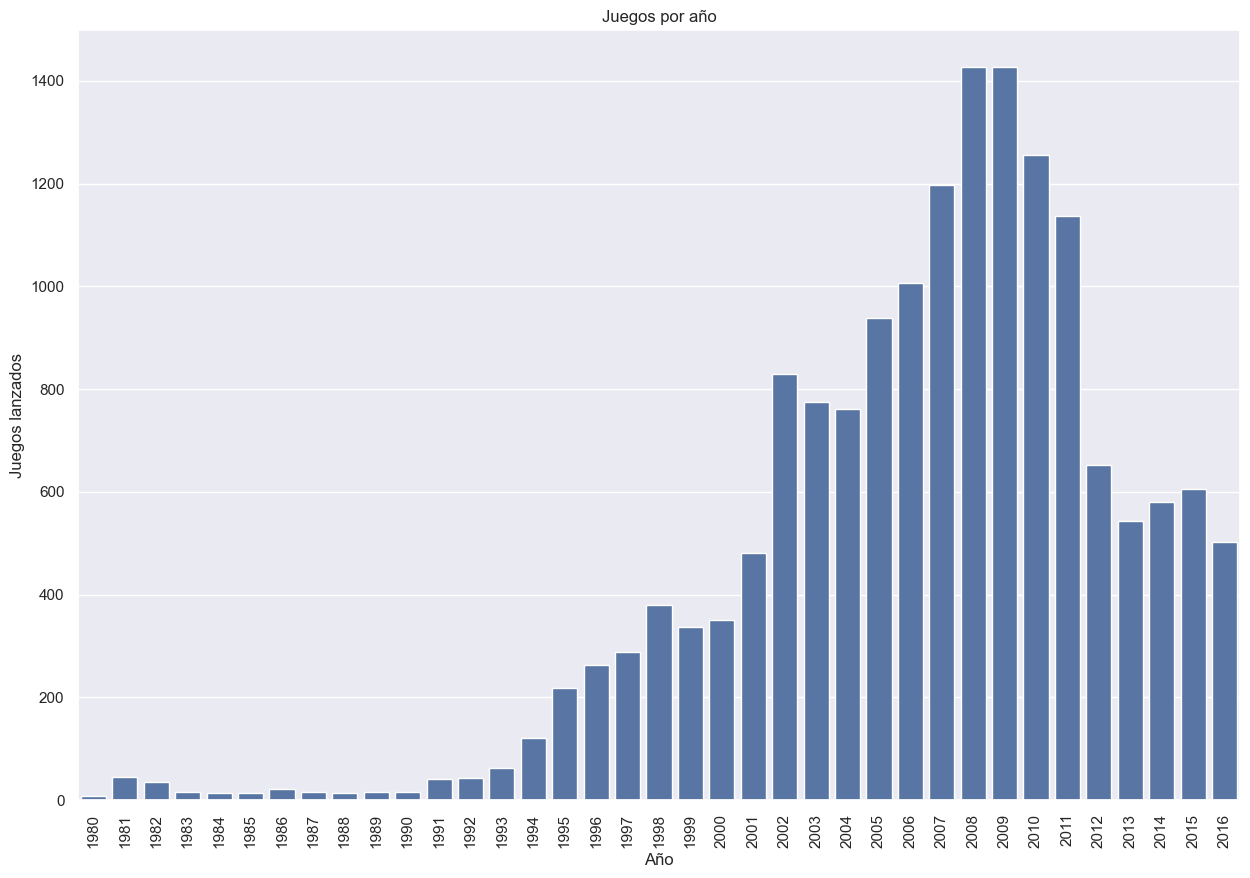

In [25]:
#se hace una exploracion de juegos por año
per_year = games[games["year_of_release"]!=0].pivot_table(index= ["year_of_release"], values= "name", aggfunc= "count")
graf1 = sns.barplot(data= per_year.reset_index(), x="year_of_release",y="name")
plt.xticks(rotation=90)
graf1.set(title="Juegos por año", xlabel='Año', ylabel='Juegos lanzados')
plt.show()
#print(per_year)

<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica, esta gráfica nos ayuda a entender también sobre el comportamiento del mercado de videojuegos en el tiempo
</div>

In [26]:
sales_per_plat = games.pivot_table(index= ["platform"], values= "gbl_sales", aggfunc= "sum")
sales_per_plat = sales_per_plat.reset_index().sort_values("gbl_sales",ascending=False)
print(sales_per_plat.head(10))

   platform  gbl_sales
16      PS2    1255.77
28     X360     971.42
17      PS3     939.65
26      Wii     907.51
4        DS     806.12
15       PS     730.86
6       GBA     317.85
18      PS4     314.14
19      PSP     294.05
13       PC     259.52


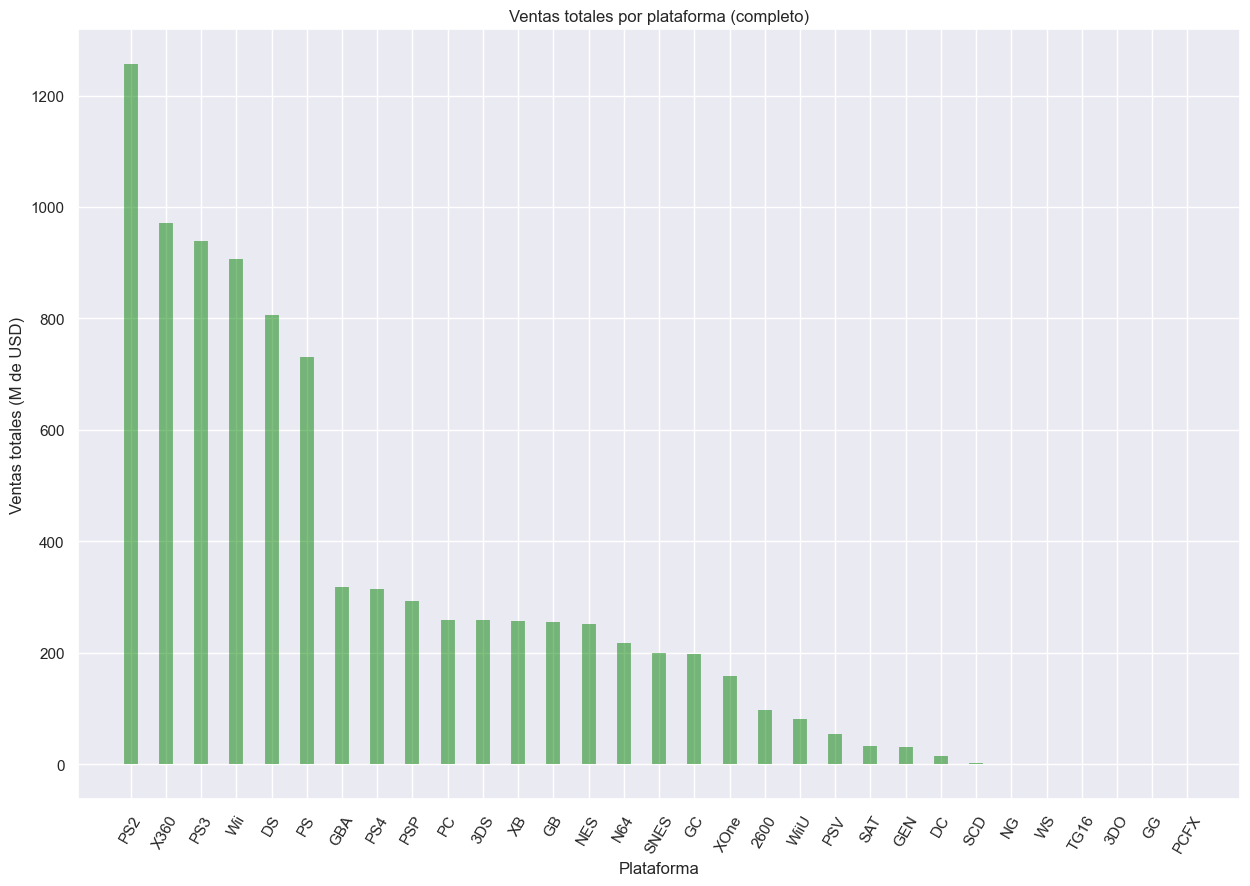

In [27]:
#Se hace una grafica con las ventas totales de todas las plataformas
fig, ax = plt.subplots(figsize=(15,10))
ax.vlines(x=sales_per_plat.platform, ymin=0, ymax= sales_per_plat.gbl_sales, alpha=0.5, linewidth=10, color="green")
ax.set_xticks(sales_per_plat.platform)
ax.set_xticklabels(sales_per_plat.platform, rotation=60)
ax.set_title("Ventas totales por plataforma (completo)")
ax.set_xlabel("Plataforma")
ax.set_ylabel("Ventas totales (M de USD)")
plt.show()

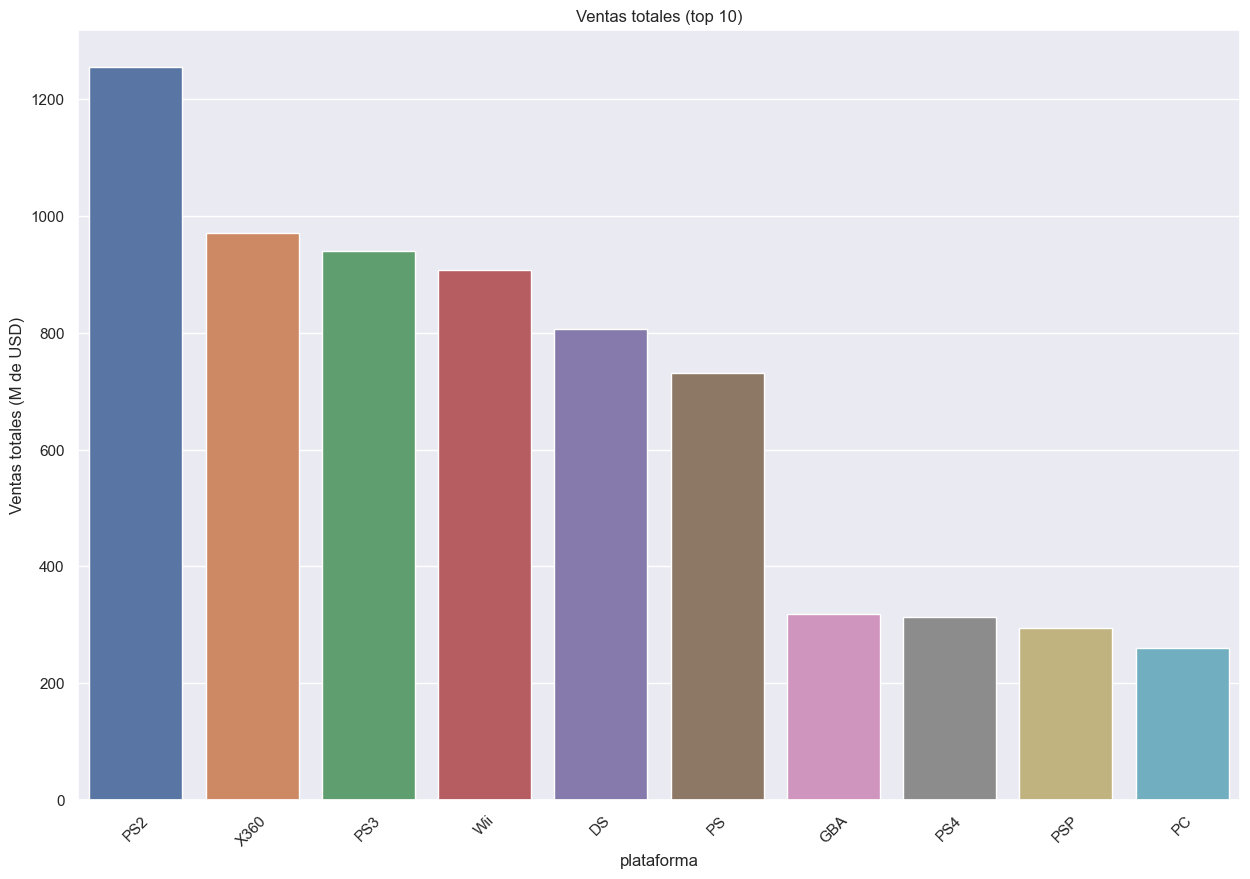

In [28]:
#con el proposito de visualizar mejor los datos se hace una segunda grafica con el top 10 de plataformas
graf2 = sns.barplot(data= sales_per_plat.head(10), x="platform",y="gbl_sales",hue="platform")
plt.xticks(rotation=45)
graf2.set(title="Ventas totales (top 10)", xlabel='plataforma', ylabel='Ventas totales (M de USD)')
plt.show()


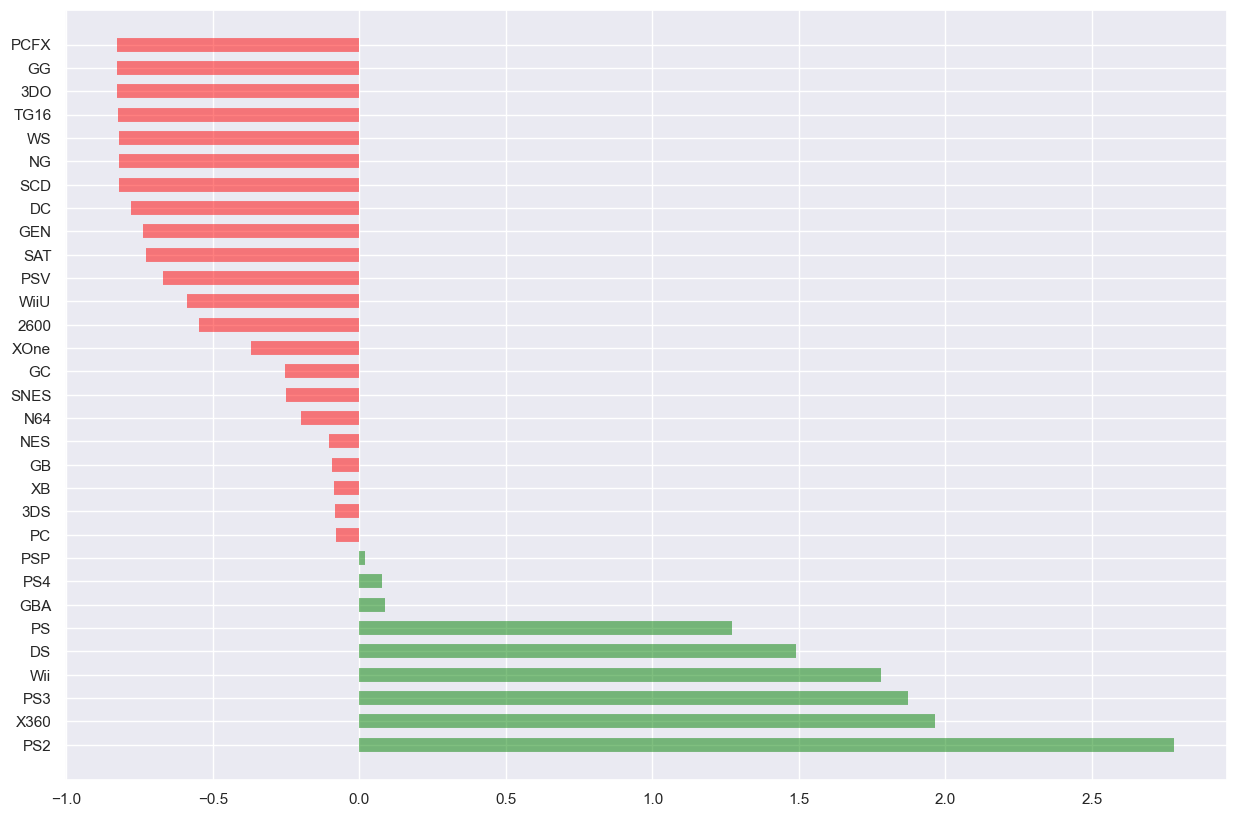

In [29]:
#Comparacion de ventas, para ver que plataformas son mas rentables por encima de la media de ventas global.
sales_per_plat["zscore"] =(sales_per_plat["gbl_sales"] - sales_per_plat["gbl_sales"].mean()) / sales_per_plat["gbl_sales"].std()
sales_per_plat["color"] = ["red" if puntaje <0 else "green" for puntaje in sales_per_plat["zscore"]]

plt.figure(figsize= (15,10))
plt.hlines(
    y=sales_per_plat.platform,
    xmax=sales_per_plat.zscore,
    xmin=0,
    linewidth = 10,
    alpha = 0.5,
    color=sales_per_plat.color
)
plt.show()

Se observa que la mayo rentabilidad de las consolas son PS2, X360, PS3, WII, DS & PS. Para los analisis futuros se seleccionaran esas 6 consolas.

In [30]:
dat_05adv = games[games.year_of_release >= 2011]
pltfm_filt = ["PS2", "X360", "PS3", "Wii", "DS", "PS"]
dat_05adv_pltfrm = dat_05adv.query("platform in @pltfm_filt")
#seleccionamos solo los datos de 2006 en adelante para futuros analisis y generar los estadisticos

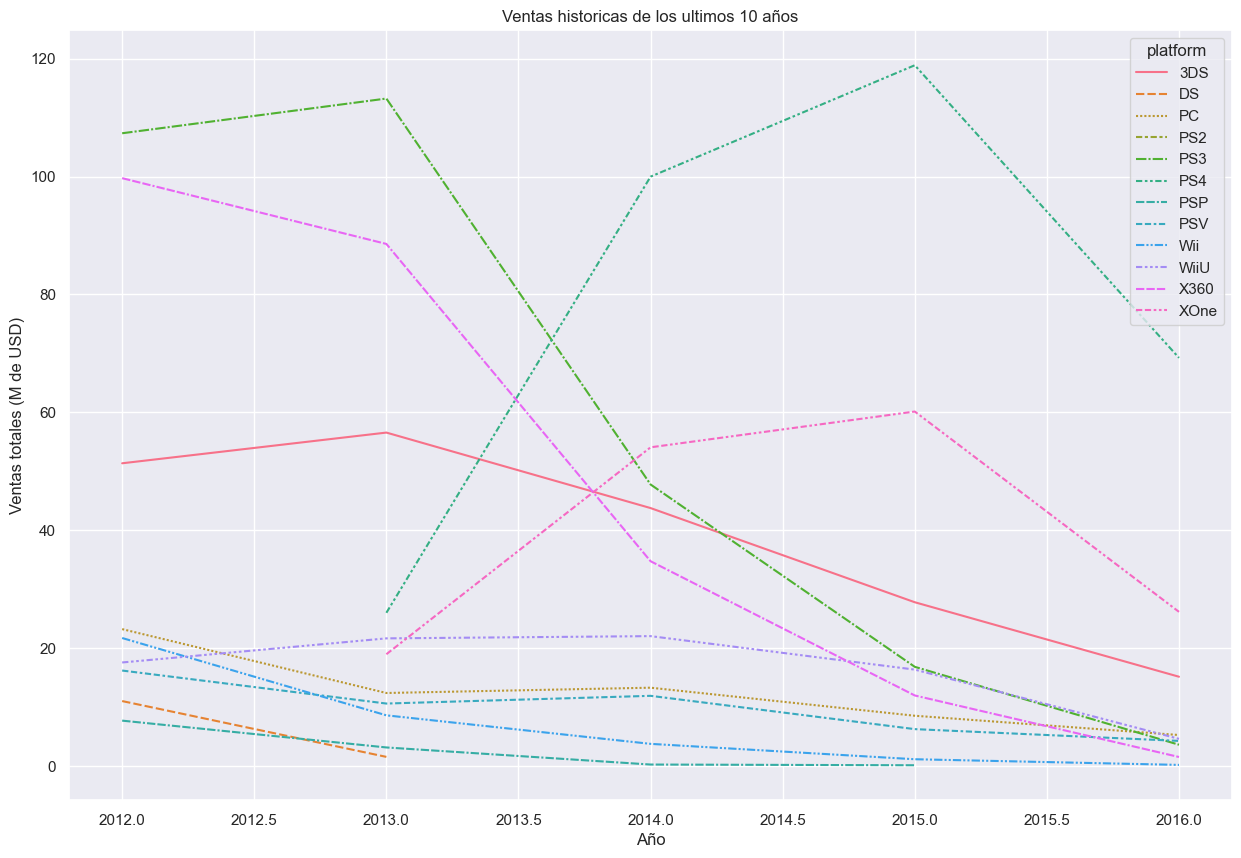

In [31]:
#Se hace un historico de ventas desde el año 2005 


vnts_x_tiempo = dat_05adv.pivot_table(index= "year_of_release", columns= "platform", values="gbl_sales", aggfunc="sum")
vnts_x_tiempo = vnts_x_tiempo.iloc[1:,:]
graf3 = sns.lineplot(data=vnts_x_tiempo)
graf3.set(title="Ventas historicas de los ultimos 10 años", xlabel='Año', ylabel='Ventas totales (M de USD)')
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica. Solamente te recomendaría que intentes reducir el periodo dado que el perido actual puede resultar muy extenso. Recordemos que con base en la información la popularidad la alcanzan en los primeros años. Es por ello que con un periodo largo puede no ser posible analizar de forma clara las plataformas y videojuegos actualizados y podrías estar analizando los desactualizados. Es por ello y dado que buscamos responder qué vender en 2017 te recomendareia gráficar un periodo que no supere los 5 años.     

</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

He realizado la modificacion a los ultimos 5 años como fue sugerido; se realizan los analisis y graficas con base en este nuevo rango de fechas 😀 


Se observa que la mayoria de las consolas tienen un tiempo de vida de apoximadamente 10 años.

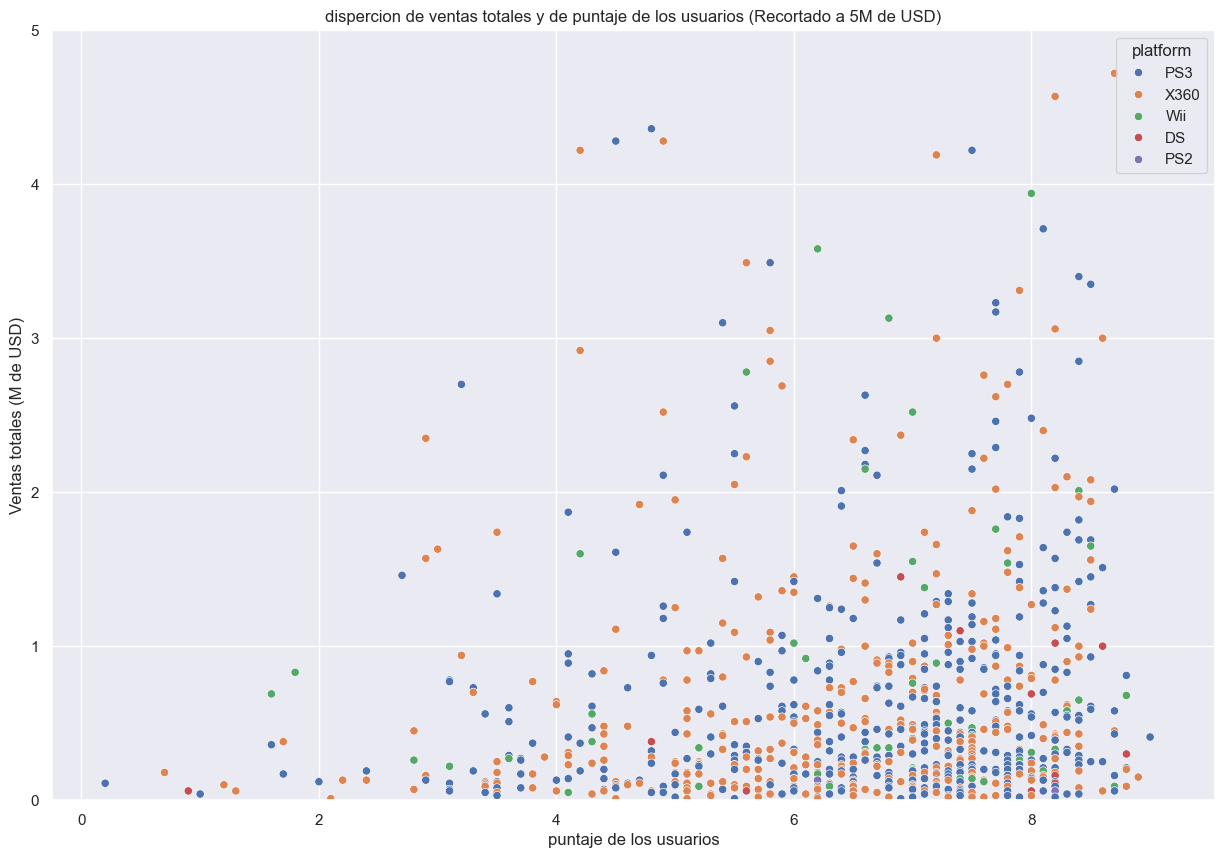

La covarianza es de:  1.9848908210009166


In [32]:
graf4 = sns.scatterplot(data=dat_05adv_pltfrm, x= "user_score", y= "gbl_sales", hue= "platform")
graf4.set(ylim=(0, 5))
#plt.xticks(rotation=45)
graf4.set(title="dispercion de ventas totales y de puntaje de los usuarios (Recortado a 5M de USD)", xlabel='puntaje de los usuarios', ylabel='Ventas totales (M de USD)')
plt.show()

print("La covarianza es de: ",np.cov(dat_05adv_pltfrm["user_score"], dat_05adv_pltfrm["gbl_sales"])[1,1])

Se observa en este grafico, el cual fue recortado para fines de presentacion a un valor de 5M de USD, que existe una aparente tendencia a que mientras mejor puntuado este un juego por los usuarios, mas ventas tendra.

Aunque la covarianza de los mismos es muy poca se observa una relacion positiva tenue al respecto 

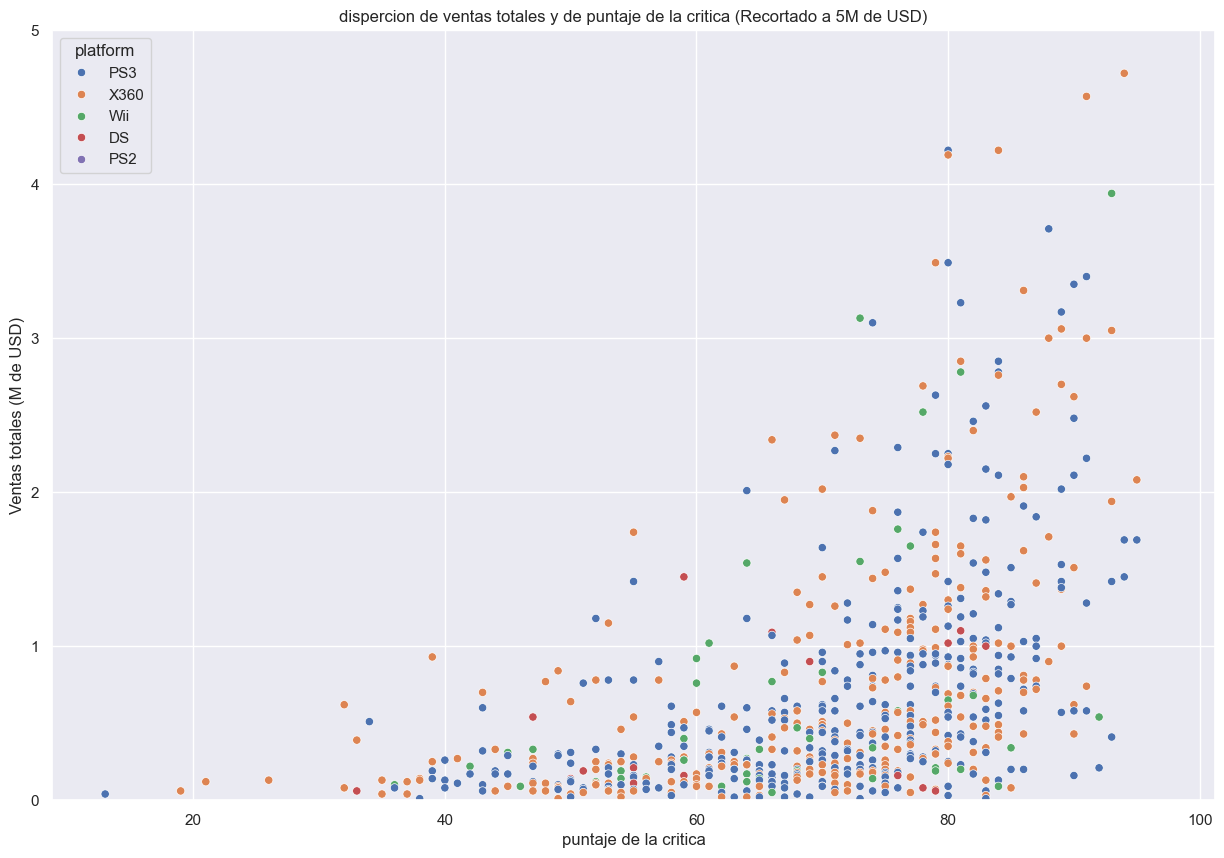

La covarianza es de:  1.9848908210009166


In [33]:
graf5 = sns.scatterplot(data=dat_05adv_pltfrm, x= "critic_score", y= "gbl_sales", hue= "platform")
graf5.set(ylim=(0, 5))
#plt.xticks(rotation=45)
graf5.set(title="dispercion de ventas totales y de puntaje de la critica (Recortado a 5M de USD)", xlabel='puntaje de la critica', ylabel='Ventas totales (M de USD)')
plt.show()

print("La covarianza es de: ",np.cov(dat_05adv_pltfrm["critic_score"], dat_05adv_pltfrm["gbl_sales"])[1,1])

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Excelente trabajo con estas gráficas para mostrar la relación entre las scores y las ventas

De igual manera al evaluar vs el puntaje de la critica, se encuentra que exite una relacion muy debil entre las variables. 

<div class="alert alert-block alert-danger">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente trabajo con el análisis de los datos, craste gráficas que dan mucha idea de los resultados. Solamente para terminar de complementar te recomiendo realizar una gráfica de cajas para comparar los resultados en ventas de cada plataforma. 
 
</div>

## Parte 4 

### Perfil de usuario para cada región

   platform  na_sales  eu_sales  jp_sales
0       3DS     82.65     61.27    100.62
1        DS     18.86      9.24      8.04
2        PC     29.88     56.70      0.00
3       PS2      0.13      0.13      0.09
4       PS3    168.26    163.10     49.39
5       PS4    108.74    141.09     15.96
6       PSP      2.19      1.77     24.04
7       PSV     12.47     13.07     21.84
8       Wii     48.56     29.60      8.97
9      WiiU     38.10     25.13     13.01
10     X360    226.80    117.10      3.35
11     XOne     93.12     51.59      0.34


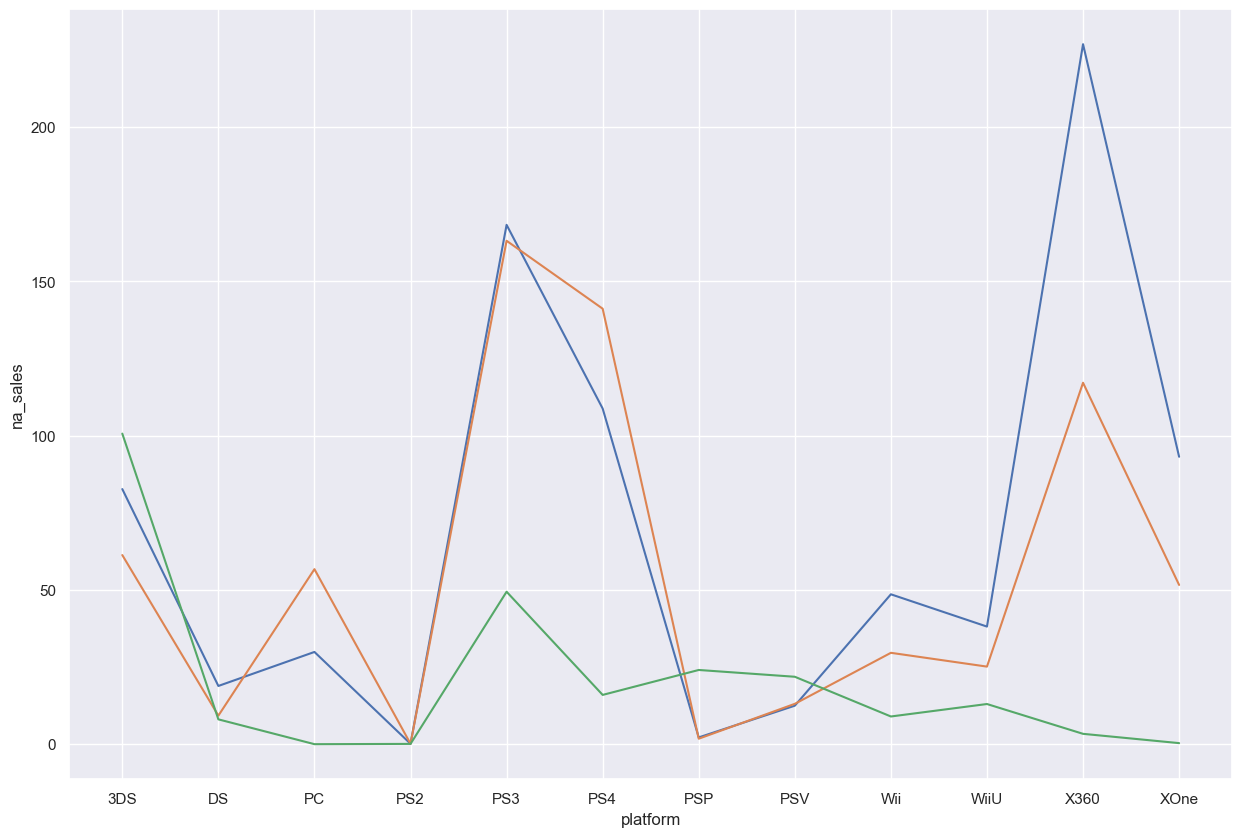

In [34]:

dat_byReg=dat_05adv.groupby("platform")[["na_sales", "eu_sales", "jp_sales"]].sum().reset_index()
print(dat_byReg)

graf6 = sns.lineplot(data= dat_byReg, x="platform",y="na_sales")
graf6 = sns.lineplot(data= dat_byReg, x="platform",y="eu_sales")
graf6 = sns.lineplot(data= dat_byReg, x="platform",y="jp_sales")
plt.show()

           genre  na_sales  eu_sales  jp_sales
0         Action    230.92    199.12     63.62
1      Adventure     14.76     13.96     12.07
2       Fighting     31.63     16.24     12.38
3           Misc     69.69     39.72     17.60
4       Platform     38.28     30.07     12.13
5         Puzzle      2.74      3.56      2.91
6         Racing     31.98     40.58      5.64
7   Role-Playing     83.78     62.30     79.87
8        Shooter    194.43    148.02     11.92
9     Simulation     15.37     19.72     11.64
10        Sports    108.70     88.48     11.09
11      Strategy      7.48      8.02      4.78


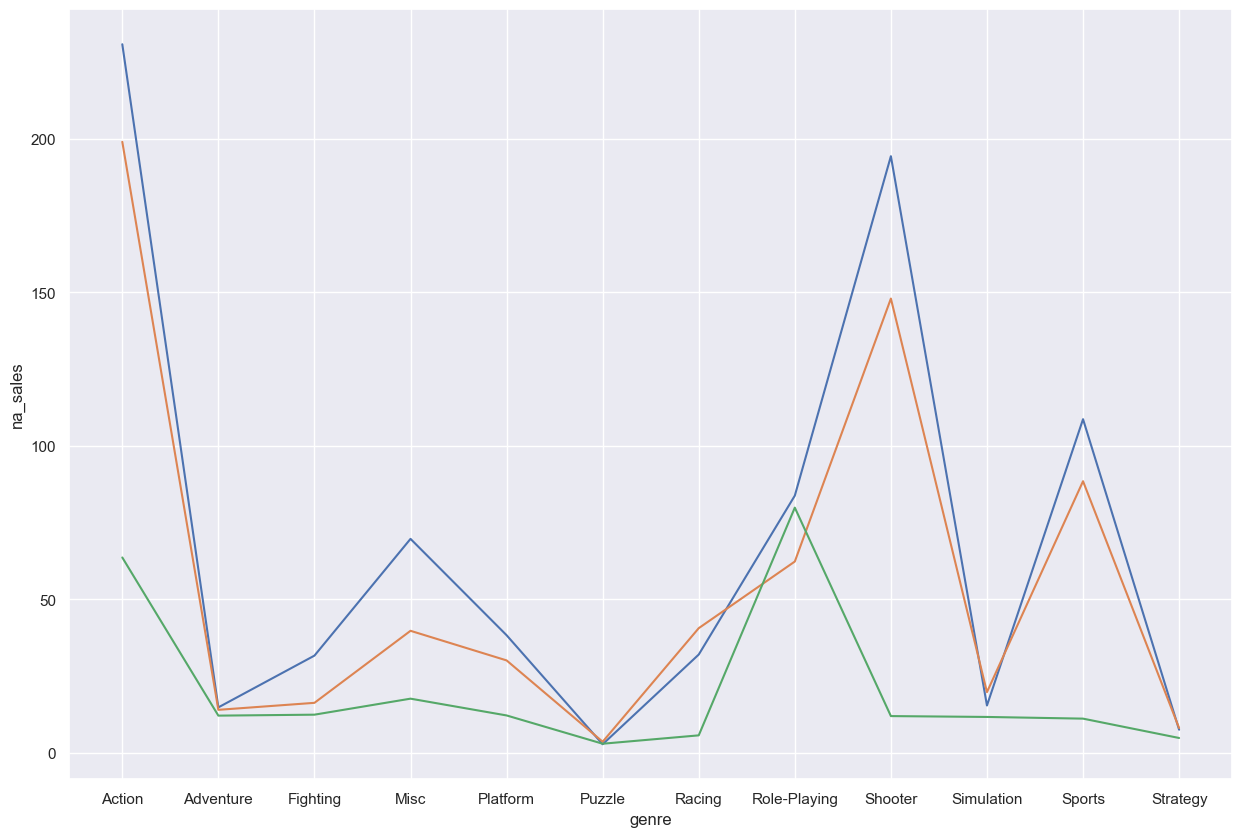

In [35]:
dat_byGen=dat_05adv.groupby("genre")[["na_sales", "eu_sales", "jp_sales"]].sum().reset_index()

print(dat_byGen)
graf6 = sns.lineplot(data= dat_byGen, x="genre",y="na_sales")
graf6 = sns.lineplot(data= dat_byGen, x="genre",y="eu_sales")
graf6 = sns.lineplot(data= dat_byGen, x="genre",y="jp_sales")

plt.show()

        rating  na_sales  eu_sales  jp_sales
0  Desconocido    123.69    116.61    138.21
1            E    170.17    141.73     36.68
2         E10+    117.72     78.00     11.23
3           EC      0.42      0.00      0.00
4            M    308.45    250.26     26.14
5           RP      0.00      0.03      0.00
6            T    109.31     83.16     33.39


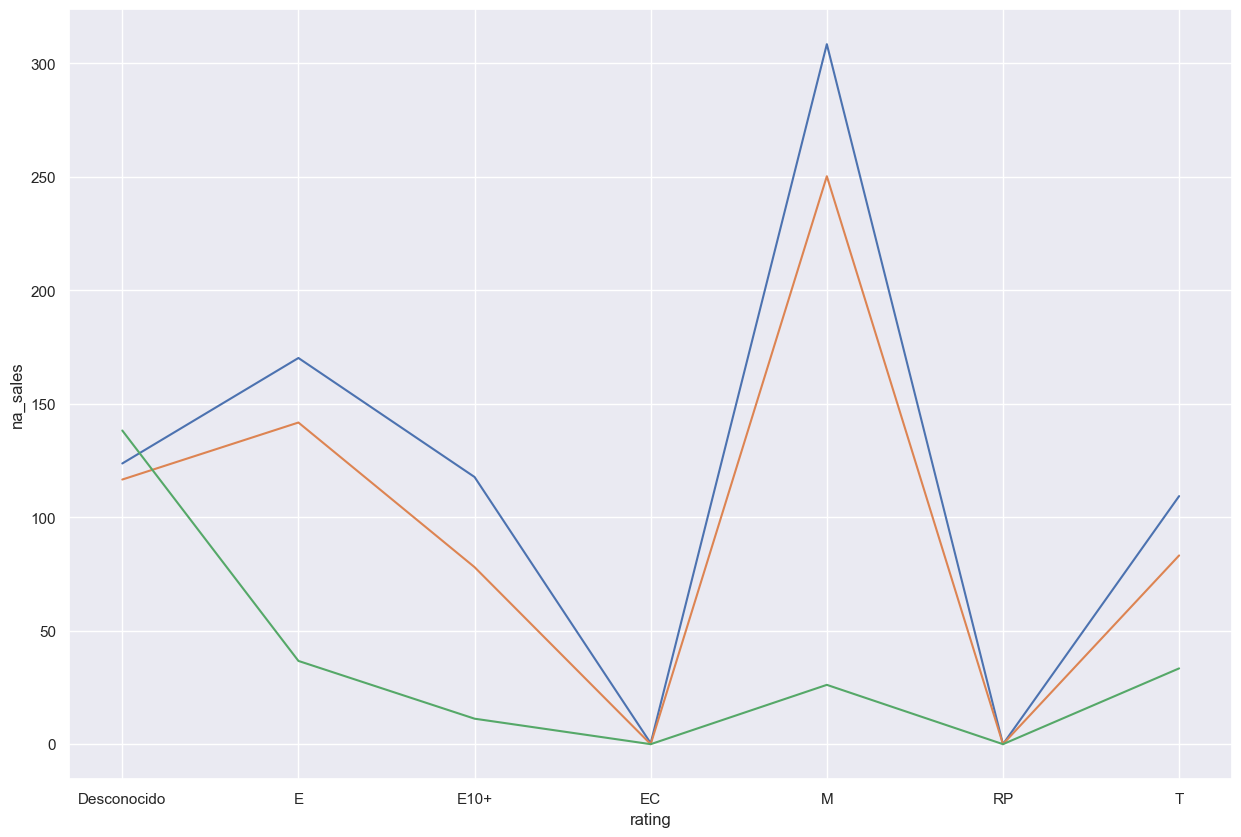

In [36]:
dat_byRating=dat_05adv.groupby("rating")[["na_sales", "eu_sales", "jp_sales"]].sum().reset_index()

print(dat_byRating)
graf7 = sns.lineplot(data= dat_byRating, x="rating",y="na_sales")
graf7 = sns.lineplot(data= dat_byRating, x="rating",y="eu_sales")
graf7 = sns.lineplot(data= dat_byRating, x="rating",y="jp_sales")


plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

## Paso 5
### Prueba de hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

**se establece un alfa para todas las pruebas estadisticas**

In [37]:
alpha = 0.05

La p es de: 0.6130712247638477
Los puntajes son iguales


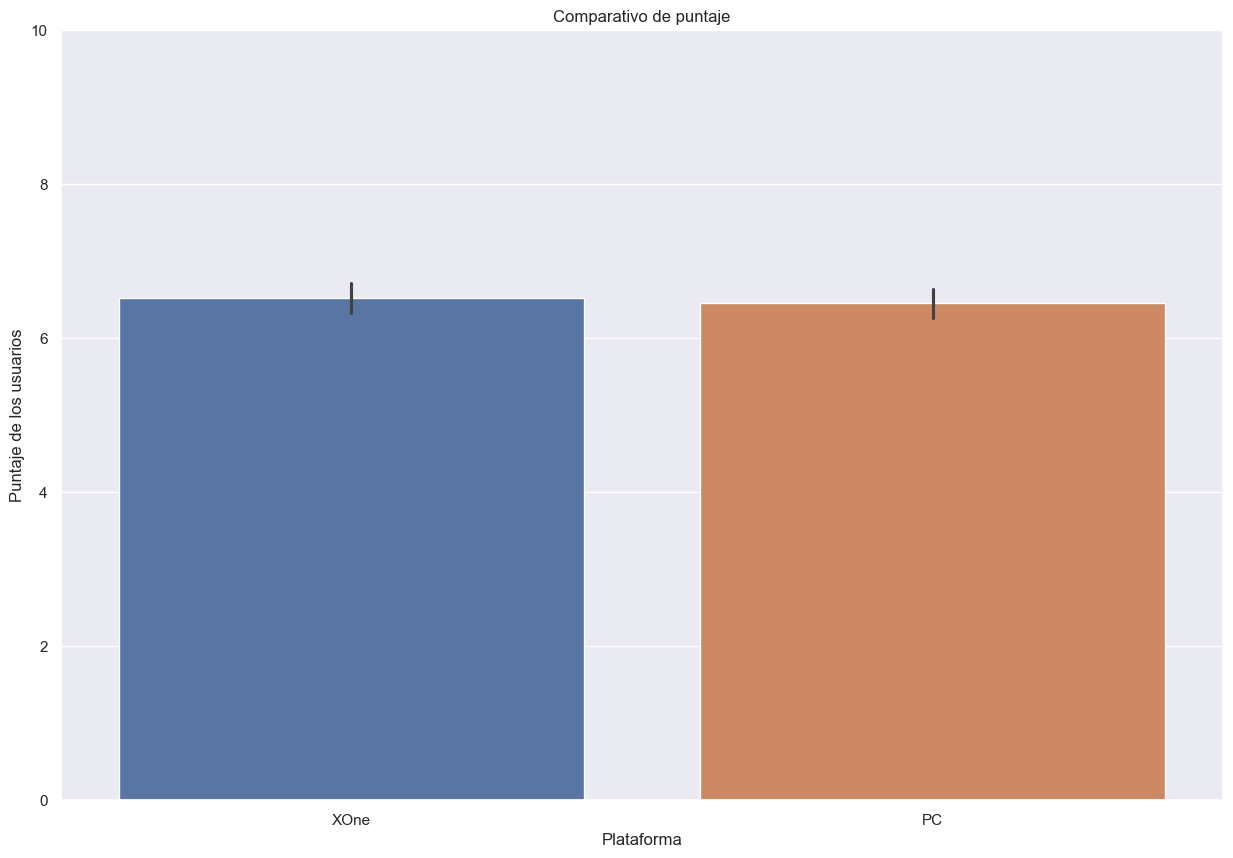

In [38]:
#Hipotesis :Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
XBO = dat_05adv[dat_05adv.platform =="XOne" ]["user_score"]
XBO = XBO.dropna()

PC = dat_05adv[dat_05adv.platform =="PC" ]["user_score"]
PC = PC.dropna()

#se hace una prueba T para muestras independientes, para ello se asumen varianzas desigulaes para usar la T de Welch que es mas robusta que la T de Student 
resul = st.ttest_ind(XBO,PC,equal_var = False)
print(f"La p es de: {resul.pvalue}")

if resul.pvalue < alpha:# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Los puntajes son diferentes entre usuarios de PC y Xbox One")
else:
    print("Los puntajes son iguales")

d_graf8 = dat_05adv[(dat_05adv.platform =="PC") | (dat_05adv.platform =="XOne" ) ][["user_score","platform"]]
graf8 = sns.barplot(d_graf8,
                    x="platform",
                    y="user_score",
                    hue= "platform")
graf8.set(title="Comparativo de puntaje", xlabel='Plataforma', ylabel='Puntaje de los usuarios')
graf8.set_ylim([0, 10])
plt.show()

La p es de: 8.285648549432564e-19
Los puntajes son diferentes entre usuarios para los generos de Acción y Deportes


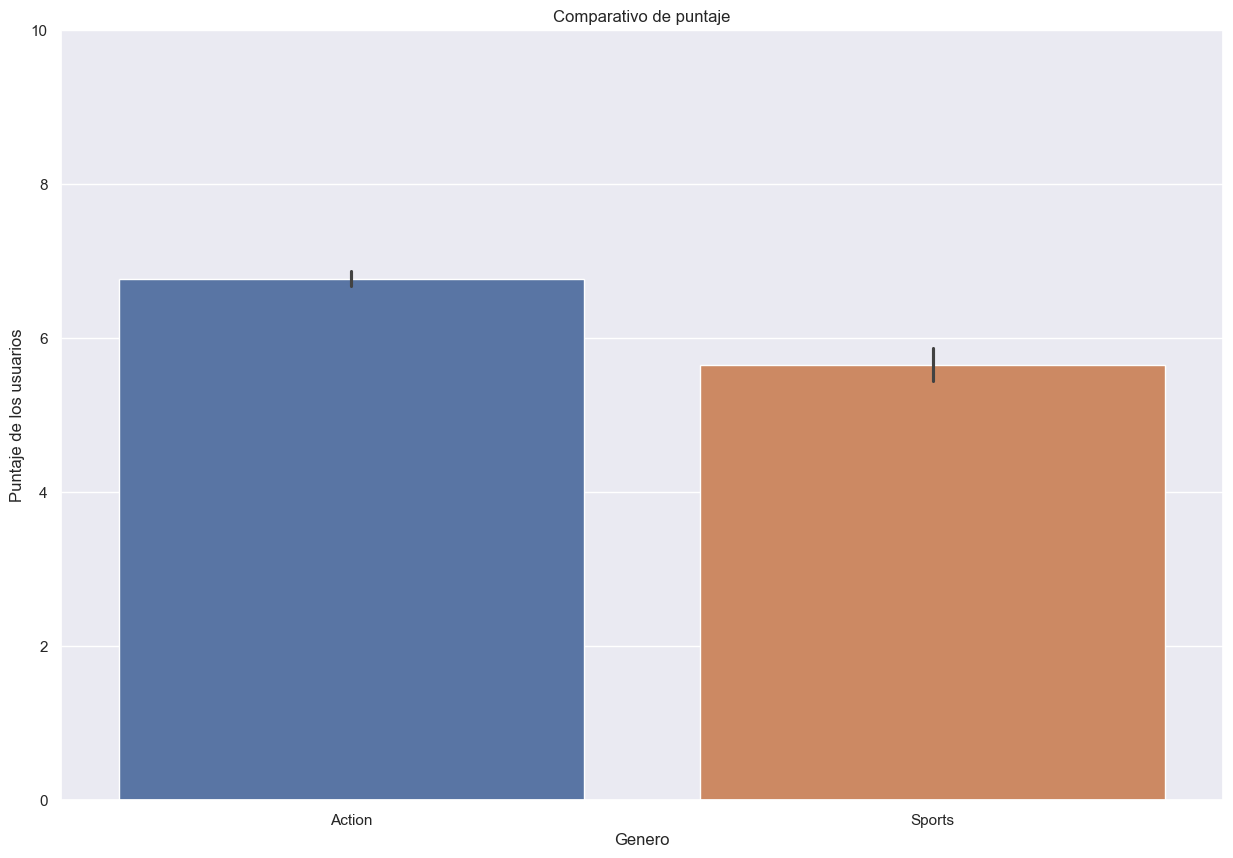

In [39]:
# Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
action = dat_05adv[dat_05adv.genre =="Action" ]["user_score"]
action = action.dropna()

sports = dat_05adv[dat_05adv.genre =="Sports" ]["user_score"]
sports = sports.dropna()

#se hace una prueba T para muestras independientes, para ello se asumen varianzas desigulaes para usar la T de Welch que es mas robusta que la T de Student 
resul = st.ttest_ind(action,sports,equal_var = False)
print(f"La p es de: {resul.pvalue}")

if resul.pvalue < alpha:# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Los puntajes son diferentes entre usuarios para los generos de Acción y Deportes")
else:
    print("Los puntajes son iguales")

d_graf8 = dat_05adv[(dat_05adv.genre =="Action") | (dat_05adv.genre =="Sports" ) ][["user_score","genre"]]
graf8 = sns.barplot(d_graf8,
                    x="genre",
                    y="user_score",
                    hue= "genre")
graf8.set(title="Comparativo de puntaje", xlabel='Genero', ylabel='Puntaje de los usuarios')
graf8.set_ylim([0, 10])
plt.show()

 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(XBO,PC)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Hola, como comente no realizo la prueba de levene ya que se asumen varianzas desiguales al emplear la prueba t de Welch, ya que actualmente no se recomienda realizar una prueba previa de igualdad de varianzas y después elegir entre la prueba t de Student o la prueba t de Welch. Más bien, la prueba t de Welch puede aplicarse directamente y sin desventajas sustanciales con respecto a la prueba t de Student, como se ha señalado anteriormente. La prueba t de Welch sigue siendo robusta para distribuciones sesgadas, la cual tiene una fiabilifad mayor en casos donde la distirbucion esta sesgada y es menor, sin embargo sigue resultando con mayor fiabildiad para muestas de mayor tamaño.

Adjutno la documentacion al respecto:  
  - https://doi.org/10.1348/000711004849222C
    
  -  https://doi.org/10.1186%2F1471-2288-12-78
    
  -  https://doi.org/10.1016/j.cct.2009.06.007

    
Es por eso que dentro de la prueba coloco "equal_var" false, asumiendo varianzas des iguales, como lo indica el manual de la funcion; https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html#scipy.stats.ttest_ind_from_stats:~:text=If%20False%2C%20perform-,Welch%E2%80%99s%20t%2Dtest,-%2C%20which%20does%20not
     <a class="tocSkip"></a>
</div>


# Paso 6. 
## Conclusión general

Para este proyecto integrado se analizatron datos desde 1980 hasta el 2016, de una tienda juegos tipo gamestop, se hizo una exploracion inicial se detectaron y corrigieron los problemas.

- En la primer exploracion visual por año se encontro que el incremento en la cantidad de juegos unicio en torno a 2005-2006 (Se selecciona el periodo desde ese año para posteriores analisis con base en esto)
- Se observa que las plataformas lideres en ventas son:  (para esto)
  - PS 2 
  - Xbox 360
  - PS3
  - Wii
  - Nintendo DS
  - PS 
  - GBA
- Se hizo un comparativo de todas las consolas en cuanto a ventas por necima de la media para verificar que sean rentables, Esto corrobora los datos observados incialmente donde las consolas mas rentables son las ya antes mencionadas.
- Para observar el comportamiento historico de ventas se hace un grafico de lineas
  - A raiz de este grafico observamos que las platarfomas tienen una rentabilidad promedio de 10 años 
- Se realizan graficos de dispersion recortados para observar si existe alguna tendencia o asociacion entre el puntaje asignado por la critica o los usuarios en las 5 plataformas mas rentables.
  - Se observa que aunque hay un ligero aumento de las ventas para puntajes menores, al realizar una prueba de covarianza se confirma que aunque hay una leve tendencia no estan directamente relacionados al tener una covarianza de 3~.
- Se genera un pergil de usuario para cada region.
  - Se presenta la tabla para los ultimos 10 años, se observan las 15 consolas que han cooexitido en ese tiempo
    - se presenta la gracfica de la misma tabla para fines comparativos de manera visual, nuevamente confirmamos las 5 consolas mas rentables.
  - De igual manera se genera una tabla agrupando por genero. Se observa que los generos mas rentables son accion, shooter y deportes.
    - Se presenta grafica
  - Finalmente, agrupando por genero asignado por la ESRB. Se observa que los generos mas rentables son Everyone y Madure en menos medida
- Estos resultados se muestran generalmente consistentes independientemente de la region.
- Para fines de evaluacion estadistica se prueban las hipotesis sugeridas.
    - **Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**
    - Se observa que los puntajes difieren entre plataformas, siendo los puntajes de PC superiores de manera significativa a los de Xbox one (como podemos observar en la grafica)
     - **Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**
     - De igual manera se observa que los usuarios puntuan mejos los juegos de Accion vs los de deportes, esto igual se corrobora en la grafica mostrada.

- Finalmente, se recomiendan futuros analisis entre ellos un ANOVA para contrastar entre los generos, consolas y entre regiones. Esto con la finalidad de observar la diferencias individuales para cada uno de los factores.
- De igual, dependiendo de los objetivos comerciales y directivos se propone realizar mas analisis. Entre ellos se sugiere el ticket promedio segmentando por consola, region y genero. 

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Elas, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar que cuando llenamos variables con valores nulos los estamos comletando con valores que no sesgan nuestros resultados

*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
</div>